<a class="anchor" id="home"><img src="Images/frangiPANe.png" width=50% align=right></a>

***

# <span style="color: #3987C4;">Table of contents</span>
<a class="anchor" id="home"></a>

[I - What is frangiPANe?](#whatabout)

* [Map-then-assembly approach](#approach)
* [Requirements](#requirements)
* [Data test](#datatest)
* [License](#license)
    
[II - Preparing frangiPANe analysis](#howtoconfigure)
* [Import python packages used by frangiPANe](#importpackages)
* [Definition of input data used by frangiPANe workflow](#configinput)
* [Creating frangiPANe output directory](#outputdir)
* [Creating log file](#logfile)
* [Preparing Genome Reference for next analysis](#reference)
* [Analyzing Group File](#group)
    
[III - Workflow](#workflow)
* [1 - Stats about raw data](#rawdata)
* [2 - Mapping the individuals reads against the reference genome](#mapping)
* [3 - Assembly of the individuals' reads that do not map (properly paired) on the reference genome](#assembly)
* [4 - Removing Contamination](#contamination)
* [5 - Reducing Sequence Redundancy](#redundancy)
* [6 - Anchoring Clusters on reference genome](#anchoring)

***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")

# <span style="color: #3987C4;"> I - What is frangiPANe ?  <a class="anchor" id="whatabout"></a></span>

This tool allows the generation of a linear panreference, from paired-end short-reads and a reference genome using a Map-Then-Assembly approach.

<img src="Images/frangiPANe_overview.jpg" width=70%>

### <span style="color: #919395"> _Map-then-assembly approach_ <a class="anchor" id="approach"></a></span>

<img src="Images/approachMapThenAssembly.jpg" width=80%>

### <span style="color: #919395"> _Data test_ <a class="anchor" id="datatest"></a></span>

<details>


#### __Rice__ 

##### _Illumina sequenced dataset_

3 African Rice whole-genome sequences (Cubry and al., 2018) were used (paired-end illumina, 2x101bp, ~35X) :

* AA, _O. barthii_ (African Rice wild)
* AB, _O. barthii_ (African Rice wild)
* DT, _O. glaberrima_ (African Rice cultivated)

><sub><sup>Cubry P, Tranchant-Dubreuil C, Thuillet AC, Monat C, Ndjiondjop MN, Labadie K, Cruaud C, Engelen S, Scarcelli N, Rhoné B, Burgarella C, Dupuy C, Larmande P, Wincker P, François O, Sabot F, Vigouroux Y. The Rise and Fall of African Rice Cultivation Revealed by Analysis of 246 New Genomes. Curr Biol. 2018 Jul 23;28(14):2274-2282.e6. doi: 10.1016/j.cub.2018.05.066. Epub 2018 Jul 5. PMID: 29983312.</sub></sup>

##### _Genome Reference_

_Oryza glaberrima_ (OMAPv2 sequence, ref)

</details>

### <span style="color: #919395">_Requirements_ <a class="anchor" id="requirements"></a></span>

<details>

* python version

* Python modules used
    * os, io, subprocess
    * Ipython
    * ipywidgets
    * trailets
    * tkinter
    * numpy, pandas
    * matplotlib
    * seaborn
    * panel
    
* Bioinformatics software (version)
    * ea-utils (fastq-stats [doc] (https://expressionanalysis.github.io/ea-utils/)] : Command-line tools for processing biological sequencing data. 
    * BWA [[doc](http://bio-bwa.sourceforge.net/bwa.shtml), [github](https://github.com/lh3/bwa)] : software package for mapping DNA sequences against a large reference genome
    * Samtools [[doc](http://www.htslib.org/doc/samtools.html)] : suite of programs for interacting with high-throughput sequencing data : http://www.htslib.org/download/
    * ABySS [[github](https://github.com/bcgsc/abyss)] : de novo sequence assembler intended for short paired-end reads and large genomes
    * assembly-stats [[github](https://github.com/sanger-pathogens/assembly-stats)] 
    * cd_hit [[github](https://github.com/weizhongli/cdhit/blob/master/doc/cdhit-user-guide.wiki)]

</details>

### <span style="color: #919395">_License_ <a class="anchor" id="license"></a></span>

* Licencied under CeCill-C (http://www.cecill.info/licences/Licence_CeCILL-C_V1-en.html) and GPLv3
* Intellectual property belongs to IRD, ... and SouthGreen development platform
* Written by Clothilde Chenal and Christine Tranchant-Dubreuil
* Copyright 2021

nts/These/frangiPANeGIT/ricents/These/frangiPANeGIT/ricents/These/frangiPANeGIT/rice***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")

# <span style="color: #3987C4;">II - Preparing frangiPANe analysis <a class="anchor" id="howtoconfigure"></a></span>

### <span style="color: #919395"> _Import python packages used by frangiPANe_ </span>

In [1]:
from tools.jupyter import dashboard_group
from tools.jupyter import *
from tools.frangiPANe import *

import panel as pn

pn.extension()

add_css()

text = "Import all python packages required successfully"
display_alert(text,"success")
bgc('LightBlue')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395"> _Definition of input data used by frangiPANe workflow_  <a class="anchor" id="configinput"></a></span>

<details>

* __Project Name__ : the directory name that will contain all the results generated by this analysis
* __Output Directory__ : the parent directory that will contain the __project_name__ directory
* __Fastq Directory__ : the directory that contains .fastq files of all the individuals
* __Reference File__ : the reference genome used to map all reads (fastq files). The reference genome have to be provided in a fasta format. The reference genome must be indexed by BWA for subsequent analyzes. The **REF**.amb, **REF**.ann, **REF**.bwt, **REF**.pac and **REF**.sa files are created.)
* __Group File__ :  (It is common for several individuals to have different origins when building a pangenome. To exploit this diversity in the results, PANtoum needs a tabulated file (separator = tabulation, no header); the first column corresponds to the name of the individuals (should correspond to .fastq files) and the second to the group they belong. NB : It is possible to use only one group.)

ex of samples with 2 groups : wild or cultivated
    
| sample  | group  |
|---|---|
| AA | wild | 
| AB  | wild | 
| CB  | cultivated |

</details>

Run the following cell and fill the parameters box

In [2]:
project_name, out_dir, ref_file, group_file, fastq_dir= box_config()
bgc('LightBlue')

WidgetBox(background='#E3ECF1')
    [0] Markdown(str)
    [1] Column(width=800)
        [0] Row
            [0] TextInput(name='Project name :', placeholder='Enter the name here...')
            [1] TextInput(name='Output directory :', placeholder='Enter the directory p...)
        [1] TextInput(name='Fastq directory', placeholder='Enter the directory p...)
        [2] TextInput(name='Group file', placeholder='Enter the file p...)
        [3] TextInput(name='Reference file', placeholder='Enter the file p...)
        [4] Row
            [0] Button(button_type='primary', name='SAVE', width=100)
            [1] Button(button_type='primary', name='INIT', width=100)
        [5] Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], height=200, margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395">_Creating frangiPANe output directory_<a class="anchor" id="outputdirectory"></a></span>

<img src="Images/frangiPANe_output_tree.jpg">

Be careful : if the directory already exists, files and directory that were generated by previous analysis could be removed by new analysis steps

In the log file,  all outputs generated by bioinformatics tools (eg: bwa index, mem, abyss) are saved

In [3]:
#output_dir="/home/christine/Documents/These/frangiPANeGIT/frangiPANe_rice"
output_dir = out_dir.value + "/frangiPANe_" + project_name.value
make_dir(output_dir)
logger = init_log(output_dir,project_name.value)
bgc('LightBlue')

PermissionError: [Errno 13] Permission denied: '/frangiPANe_'

In [3]:
#### TO REMOVE
project_name="rice"
output_dir="/home/christine/Documents/These/frangiPANeGIT/frangiPANe_rice"
fastq_dir="/home/christine/Documents/These/frangiPANeGIT/rice/fastq"
group_file="/home/christine/Documents/These/frangiPANeGIT/rice/rice_group.txt"
ref_file="/home/christine/Documents/These/frangiPANeGIT/rice/OglaRS2ADWL02.12chronly.fa"
logger = init_log(output_dir,project_name)

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

### <span style="color: #919395">_Preparing Genome Reference for next analysis_

#### __Genome indexation__ and __Genome dashboard__

This step is done with `bwa index` if index are absent. Indexation is required before performing reads mapping against genome reference.

In [ ]:
index_reference_genome(ref_file.value, logger)
total_genome_size=dashboard_genome(ref_file.value)
bgc('LightBlue')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Column(background='WhiteSmoke', sizing_mode='stretch_both')
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Row
        [0] Matplotlib(Figure)
        [1] DataFrame(DataFrame)
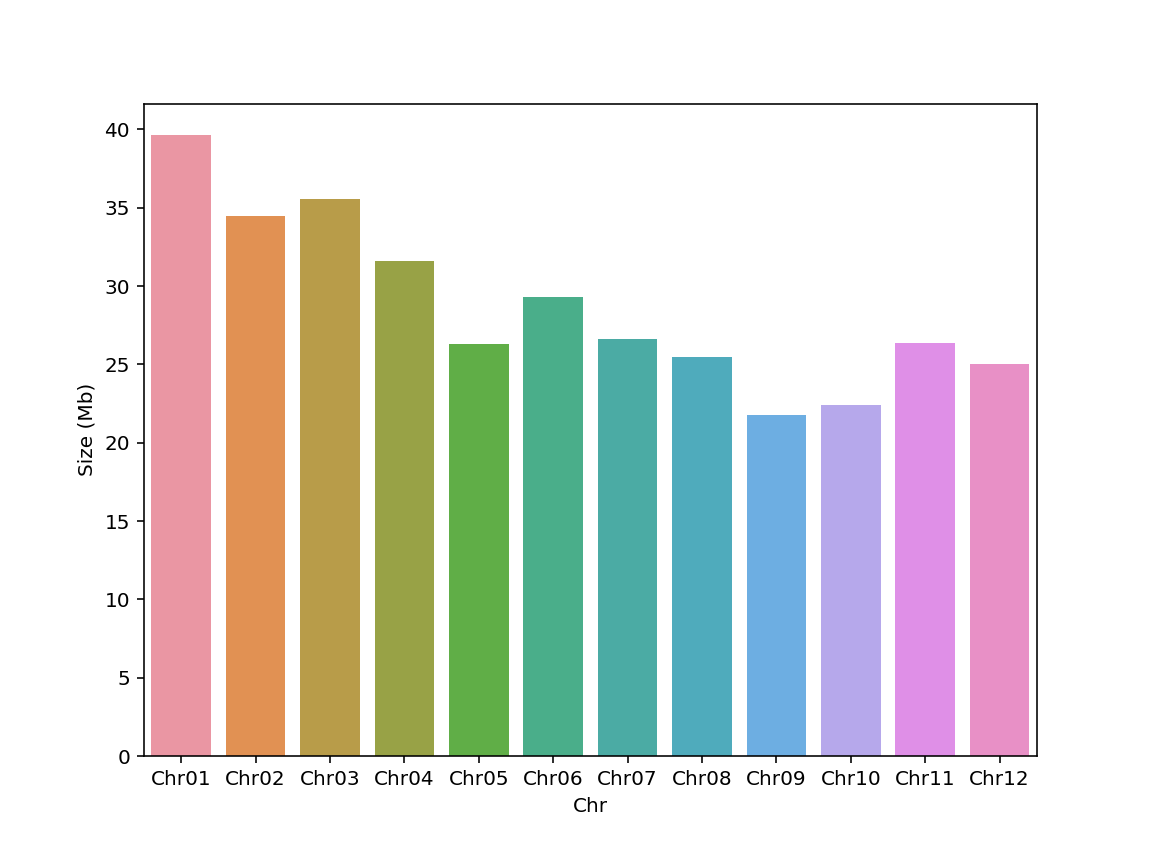

In [4]:
index_reference_genome(ref_file, logger)
total_genome_size=dashboard_genome(ref_file)
bgc('LightBlue')

### <span style="color: #919395">_Analyzing Group File_</span> 

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')


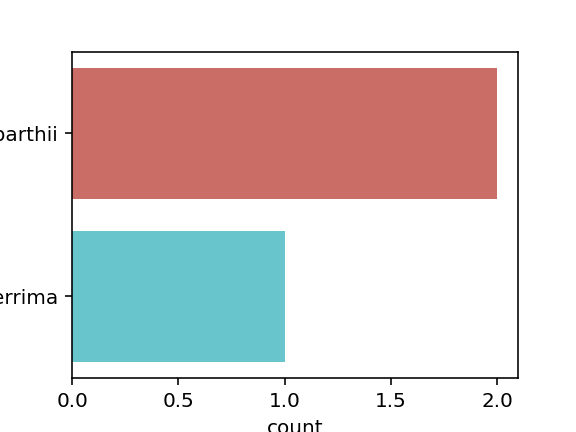

In [4]:
# Reading group file
id_dict, df_group = read_group_file(group_file.value,logger)
# Group file dashboard
dashboard_group(df_group)
bgc('LightBlue')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')


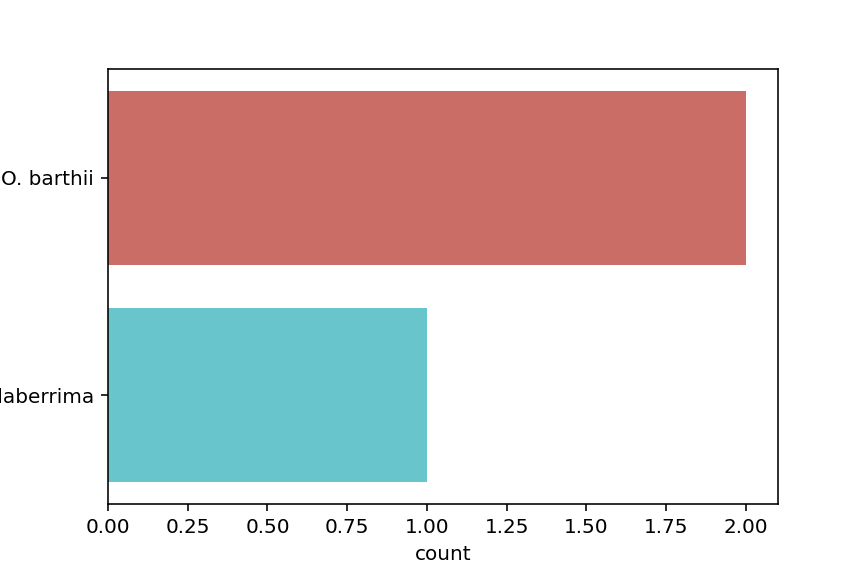

In [5]:
# Reading group file
id_dict, df_group = read_group_file(group_file,logger)
# Group file dashboard
dashboard_group(df_group)
bgc('LightBlue')

***

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")


# <span style="color: #3987C4;">III - frangiPANe Workflow <a class="anchor" id="workflow"></a></span>

<img src="Images/approachMapThenAssembly.jpg" width=60%>



Only fastq files corresponding to samples described in the group file (contained in fastq directory) will be used in this workflow.

Fastq naming convention: 
* sample_code_1.fastq, sample_code_R1.fastq
* sample_code_1.fq, sample_code_R1.fq
* sample_code_2.fastq, sample_code_R2.fastq
* sample_code_2.fq, sample_code_R2.fq

with sample_code read from the group file (1st column)

### <span style="color: #919395"> _1 - Stats about raw data (fastq files)_

#### __Generating fastq statistics with `fastq_stats`__

After this stat analysis, several files have been created and saved into 00_fastq_stats directory :
* one file (fastq-stat) by fastq file
* one file with all stats : all_fastq-stats.csv

```
TODO : 
* Message si pas de fastq <-> group
* Bilan nb fastq, nb group, nb match et si pairé
* tester si fastq corrumpu avec eeautils
* tester si etape a deja tournée correctement
```

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)
    [4] Matplotlib(Figure)
    [5] Markdown(str)
    [6] Matplotlib(Figure)
    [7] Markdown(str)
    [8] Matplotlib(Figure)
    [9] Markdown(str)
    [10] Matplotlib(Figure)
    [11] Markdown(str)
    [12] Matplotlib(Figure)
    [13] DataFrame(DataFrame, width=800)
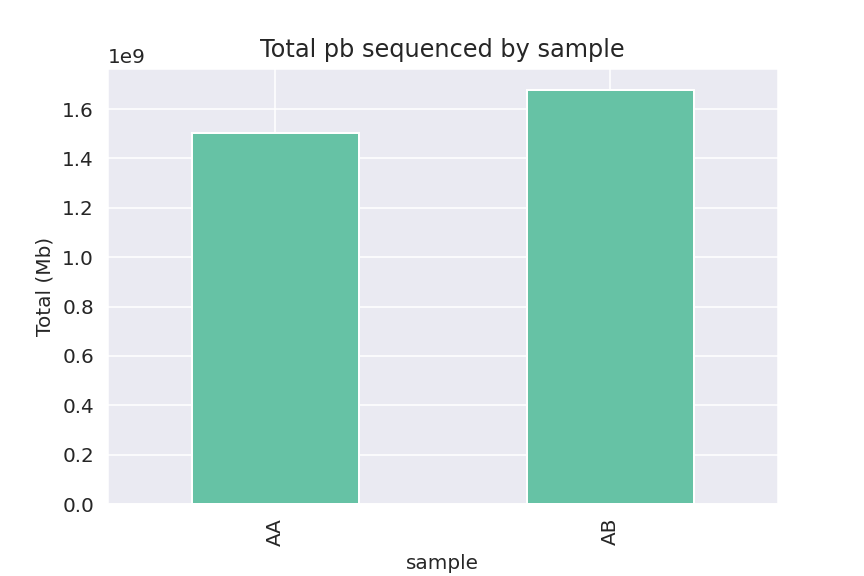
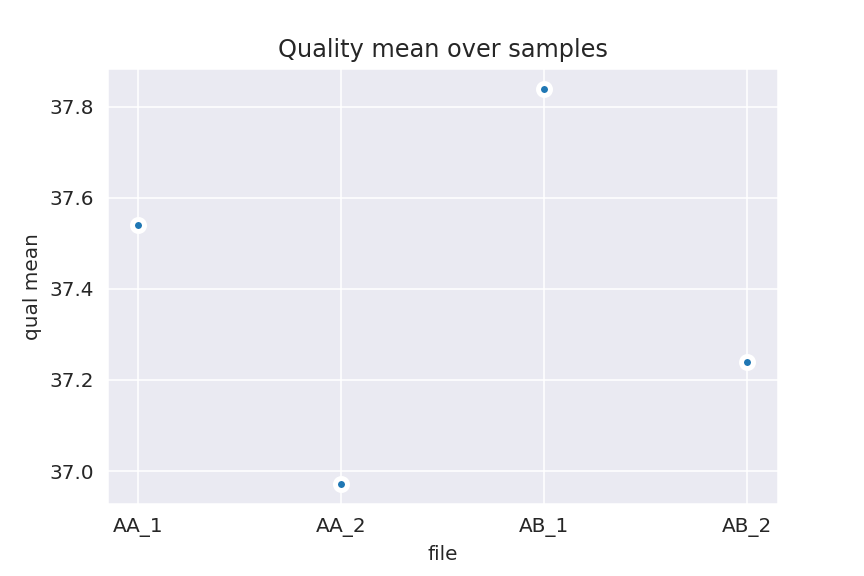
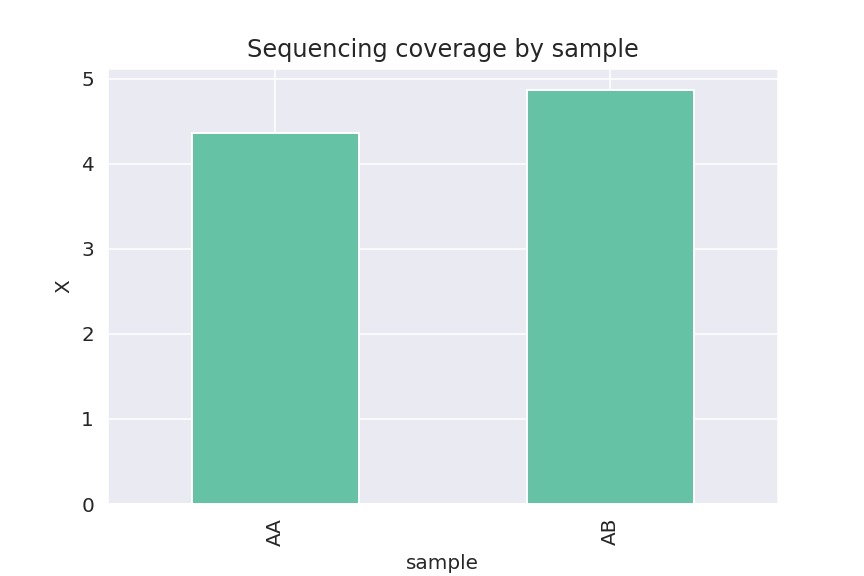
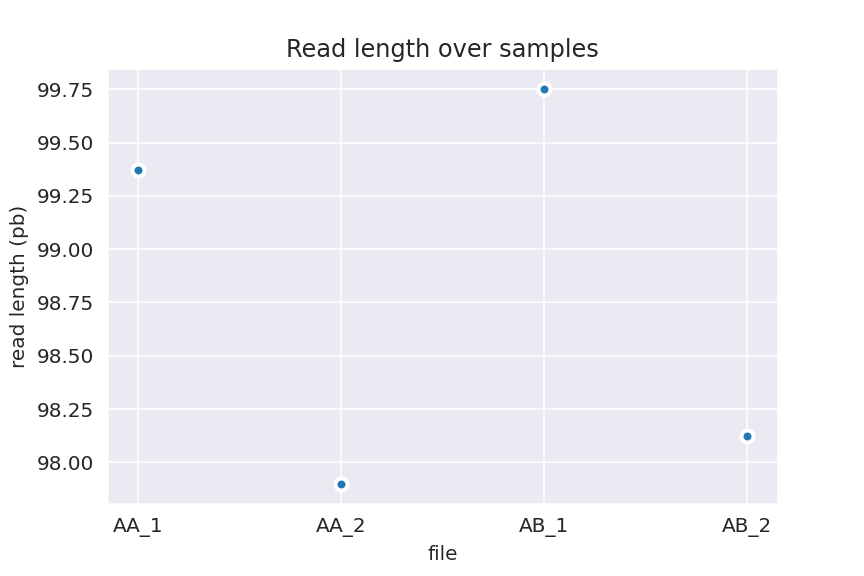
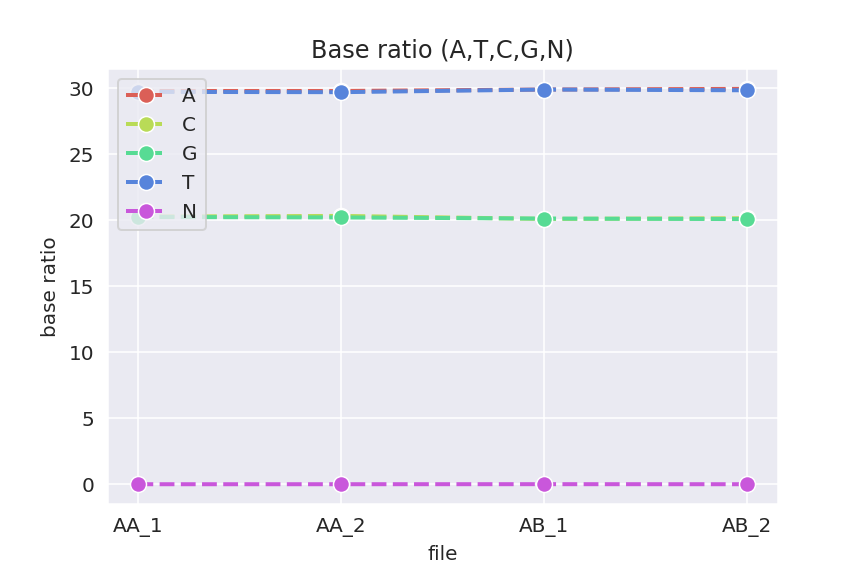

In [6]:
bgc('LightBlue')

# Creating directory
stat_dir = output_dir + "/00-fastq_stats/"

# run fastq_stats
#fastq_stats_dir(fastq_dir.value, stat_dir, df_group, logger)

# merging all files generated by fastq_sample
fastqstat_csv=stat_dir+"all_fastq-stats.csv"
merge_fastqstat(fastqstat_csv, stat_dir,logger)

#Raw data dashboard
dashboard_fastq(fastqstat_csv,total_genome_size,df_group)

### <span style="color: #919395">_2 - Mapping the individuals reads against the reference genome_  <a class="anchor" id="mapping"></a></span>


#### __Mapping with `BWA mem` <a class="anchor" id="mappingbwa">__

Options of bwa-mem : 
* -p : Assume the first input query file is interleaved paired-end FASTQ
* -M : Mark shorter split hits as secondary
* -t : Number of threads

Options of samtools sort : 
* -@ : Set number of sorting and compression threads
* -o : Write the final sorted output to FILE, rather than to standard output

In [ ]:
bgc('LightBlue')

cpu=6
output_mapping_dir = output_dir + "/01-mapping_against_reference/"
fastq2bam_dir(ref_file.value, fastq_dir.value, df_group, cpu, output_mapping_dir, logger)

#### __Generating mapping stats <a class="anchor" id="mappingstat">__
    
Statistics are generated by `samtools flagstat` and they are saved into the directory _01_mapping-against_reference_ and the subdirectory _stat_

* One "flagtstat file" is generated for each bam file (http://www.htslib.org/doc/samtools-flagstat.html).

* _all_flagstat.csv_ file 

```bash
sample MAPPED PAIRED UNMAPPED
NL 98.68 94.50 0.59
NF 98.16 96.61 0.38
...
```

In [ ]:
bgc('LightBlue')

stat_dir = output_mapping_dir + "/stat/"
make_dir(stat_dir)

logger.info(f"MAPPING STAT :")
logger.info(f"\t\tMapping stat directory : {stat_dir}")

for file_name in os.listdir(output_mapping_dir):
    if ".bam" in file_name:
        samtools_flagstat(os.path.join(output_mapping_dir,file_name), stat_dir,logger)

#### __Compiling stats into a unique tabulated file__
merge_flagstat(output_dir=stat_dir, logger=logger)

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Mapping dashboard__

Column(background='WhiteSmoke', sizing_mode='stretch_both', width=800)
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [4] Markdown(str)
    [5] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [6] Markdown(str)
    [7] Row
        [0] Markdown(str)
        [1] DataFrame(DataFrame, width=400)
    [8] Matplotlib(Figure)
    [9] Row
        [0] MultiChoice(margin=(0, 20, 0, 0), name='Group', options=['O. barthii'])
        [1] MultiChoice(margin=(0, 20, 0, 0), name='Sample', options=['AA', 'AB'])
    [10] ParamFunction(function, max_height=400, width=400)
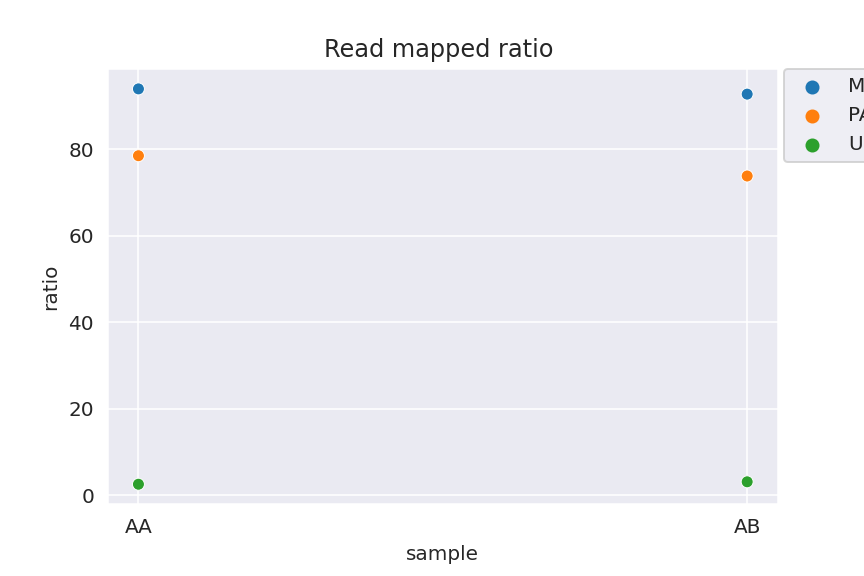

In [ ]:
bgc('LightBlue')

#output_mapping_dir = output_dir + "/01-mapping_against_reference/"
#stat_dir = output_mapping_dir + "/stat/"
stat_file = stat_dir + "all_flagstat.csv"
dashboard_flagstat(stat_file,df_group)

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")


### <span style="color: #919395">3 - Assembly of the individuals' reads that do not map (properly) on the reference genome <a class="anchor" id="assembly"></a></span>

#### __Creating assembly directory__

In [8]:
bgc('LightBlue')

output_assembly_dir = output_dir + "/02-assembly_unmapped_reads/"
make_dir(output_assembly_dir)
make_dir(output_assembly_dir + "bam_F0x2/")

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Filtering .bam files with `samtools view`__ 

Options de samtools view : -b -h -F -@ -o

In [14]:
bgc('LightBlue')

for id in id_dict : 
    bam_to_F0x2_bam(reference_genome=ref_file, 
                    bam_dir=output_mapping_dir, 
                    id=id, 
                    cpu=6, 
                    output_dir=output_assembly_dir + "bam_F0x2/", 
                    logger=logger)

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='danger', css_classes=['alert', 'alert-danger'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Assembly with ABySS__

#### _Choosing optimal k_

```control post form```

In [9]:
bgc('LightBlue')

k,step,accession,length = box_config_abyss(df_group)

WidgetBox(background='#E3ECF1')
    [0] Markdown(str)
    [1] Column(width=800)
        [0] Row
            [0] RangeSlider(end=92, name='K-mer length', start=24, step=4, value=(64, 68))
            [1] IntInput(end=10, name='Step', start=1, value=4)
        [1] MultiSelect(name='Accession', options=['AA', 'AB', 'DT'])
        [2] IntInput(end=10000, name='Minimal length t..., start=100, step=100, value=300)
        [3] Row
            [0] Button(button_type='primary', name='SAVE', width=100)
            [1] Button(button_type='primary', name='INIT', width=100)
        [4] Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], height=200, margin=(0, 0, 25, 0), sizing_mode='stretch_width')

##### Execute Abyss with several k

In [10]:
bgc('LightBlue')

make_dir(output_assembly_dir + "assembly_choosing_k/")
make_dir(output_assembly_dir + "assembly_choosing_k/abyss/")

kmin=int(k.value[0])
kmax=int(k.value[1])
st=step.value
threshold =  length.value

for k in range(kmin, kmax, step.value) :
    for id in accession.value : ### INDIVIDUS TEST
        print(id)
        #abyss_pe(project_name=project_name.value, id=id, k=k, bam_dir=output_assembly_dir + "bam_F0x2/", 
        #        output_dir=output_assembly_dir + "assembly_choosing_k/abyss/", logger=logger) 
        

make_dir(output_assembly_dir + "assembly_choosing_k/fasta_test/")
logger.info(f"FILTERING SEQUENCES >= THRESHOLD ({threshold})")

for k in range(kmin, kmax, step.value) :
    for id in accession.value : 
        filter_fastq_threshold(file=output_assembly_dir + "assembly_choosing_k/abyss/" + id + "_k" + str(k) + "/" + project_name.value+ "_" + id + "_" + str(k) + "-contigs.fa", 
                               threshold=threshold, 
                               output_file=output_assembly_dir + "assembly_choosing_k/fasta_test/" + id + "_k" + str(k) + "_thr" + str(threshold) + ".fasta") 

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

AA
AB
AA
AB
AA
AB


Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

'File /home/christine/Documents/These/frangiPANeGIT/frangiPANe_rice/02-assembly_unmapped_reads/assembly_choosing_k/fasta_test/AA_k60_thr300.fasta already existed'

'warning'

'File /home/christine/Documents/These/frangiPANeGIT/frangiPANe_rice/02-assembly_unmapped_reads/assembly_choosing_k/fasta_test/AB_k60_thr300.fasta already existed'

'warning'

'File /home/christine/Documents/These/frangiPANeGIT/frangiPANe_rice/02-assembly_unmapped_reads/assembly_choosing_k/fasta_test/AA_k64_thr300.fasta already existed'

'warning'

'File /home/christine/Documents/These/frangiPANeGIT/frangiPANe_rice/02-assembly_unmapped_reads/assembly_choosing_k/fasta_test/AB_k64_thr300.fasta already existed'

'warning'

'File /home/christine/Documents/These/frangiPANeGIT/frangiPANe_rice/02-assembly_unmapped_reads/assembly_choosing_k/fasta_test/AA_k68_thr300.fasta already existed'

'warning'

'File /home/christine/Documents/These/frangiPANeGIT/frangiPANe_rice/02-assembly_unmapped_reads/assembly_choosing_k/fasta_test/AB_k68_thr300.fasta already existed'

'warning'

##### Stats

Using assembly-stats. NB : L50 is called n50n 

In [14]:
bgc('LightBlue')

make_dir(output_assembly_dir + "assembly_choosing_k/plots/")

stat_len, stats_N_hide, stats_N, stats_L_hide, stats_L, stats_gap, stats = def_stats()
create_stats_files(stats=stats,
                  output_dir=output_assembly_dir + "assembly_choosing_k/plots/")

# for k in range(32, 97, 8) : 
for k in range(kmin, kmax, step.value) :
    for id in accession.value :
        fill_stats_files(input_dir=output_assembly_dir + "assembly_choosing_k/fasta_test/",
                id=id,
                k=k,
                output_dir=output_assembly_dir + "assembly_choosing_k/plots/",
                threshold=threshold,
                logger=logger)

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

How to choose k ? DASHBOARD + function
   * total_length : +++
   * N50 : +++
   * L50 : ---

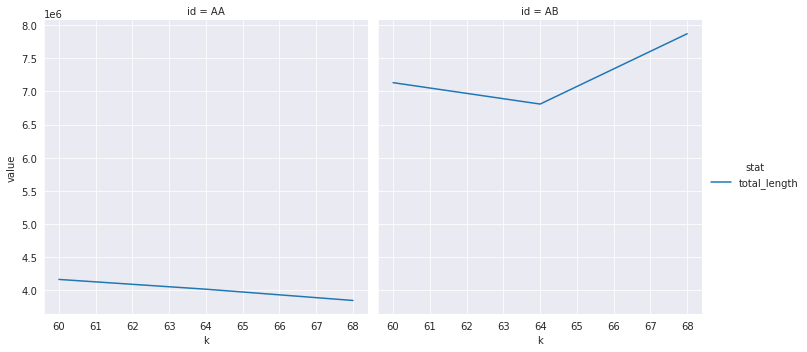

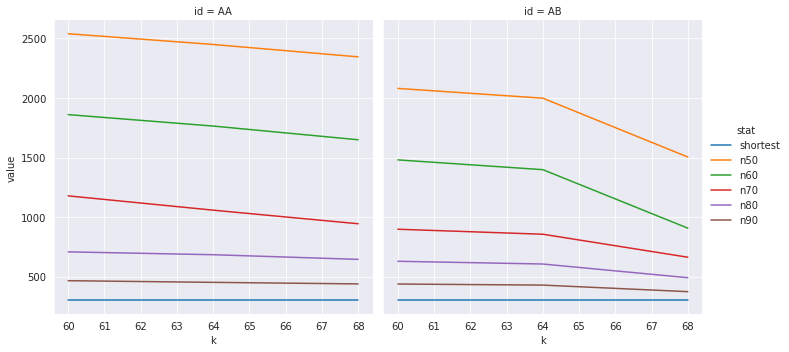

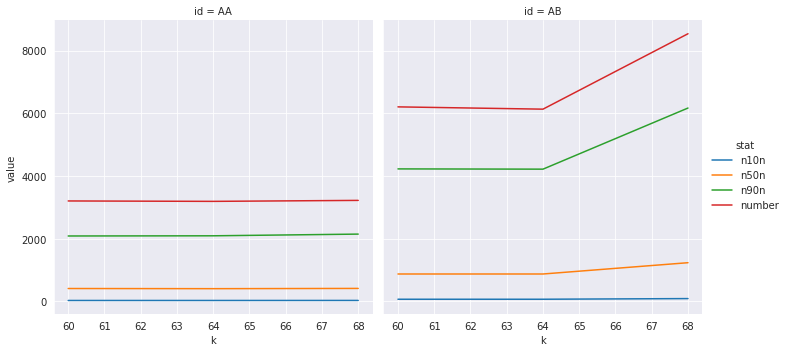

In [15]:
bgc('LightBlue')

stat_len_df = pd.read_csv(output_assembly_dir + "assembly_choosing_k/plots/assembly-stats-" + stat_len[0] + ".csv", sep='\t')

size = sns.relplot(x='k', y='value', hue='stat', data=stat_len_df, col='id', kind="line")
size.savefig(output_assembly_dir + "assembly_choosing_k/plots/stat_len.png")


stats_N_files = []
for stat in stats_N : 
    stats_N_files.append(output_assembly_dir + "assembly_choosing_k/plots/assembly-stats-" + stat + ".csv")
stats_N_df = pd.concat([pd.read_csv(f, sep='\t') for f in stats_N_files], ignore_index = True)

size = sns.relplot(x='k', y='value', hue='stat', data=stats_N_df, col='id', kind="line")
size.savefig(output_assembly_dir + "assembly_choosing_k/plots/stat_N.png")

stats_L_files = []
for stat in stats_L : 
    stats_L_files.append(output_assembly_dir + "assembly_choosing_k/plots/assembly-stats-" + stat + ".csv")
stats_L_df = pd.concat([pd.read_csv(f, sep='\t') for f in stats_L_files], ignore_index = True)

size = sns.relplot(x='k', y='value', hue='stat', data=stats_L_df, col='id', kind="line")
size.savefig(output_assembly_dir + "assembly_choosing_k/plots/stat_L.png")



```PUT BOX TO SELECT k```

In [16]:
bgc('LightBlue')
k = box_config_abyss2()
#accession.value = ['AA','AB']

WidgetBox(background='#E3ECF1')
    [0] Markdown(str)
    [1] Column(width=800)
        [0] IntInput(end=92, name='K-mer length', start=24, value=64)
        [1] Row
            [0] Button(button_type='primary', name='SAVE', width=100)
            [1] Button(button_type='primary', name='INIT', width=100)
        [2] Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], height=200, margin=(0, 0, 25, 0), sizing_mode='stretch_width')

display(df.iloc[1])KBOARD
   * total_length : +++
   * N50 : +++#
   
### Running ABySS for each individual

In [43]:
bgc('LightBlue')
!mkdir $output_assembly_dir"assembly_all_contigs/"

#for id in df_group :
for index, row in df_group.iterrows() :
    #print(row['sample'])
    id = row['sample']
    if index==2 :
        continue
        
    if id in accession.value :
        id_folder = output_assembly_dir + "assembly_choosing_k/abyss/" + id + "_k" + str(k.value) + "/"
        target_folder = output_assembly_dir + "assembly_all_contigs/"
        
        print(row['sample'])
        cmd = f"scp -r { id_folder } { target_folder }"
        process = subprocess.run(cmd, shell=True, capture_output=True, text=True)

        if process.returncode:
            log = f'FAILED EXECUTION : {cmd}\n{process.stdout}\n{process.stderr}'
            raise ValueError(log)
        else:
            #display(msg_button(f"SUCCESSFUL INDEXATION: {cmd}", 'green', 'classic'))
            logger.info(f"\t\tLog : {process.stdout + process.stderr}\n")
            break
            
    else : 
        abyss_pe(project_name=project_name, 
                 id=id, 
                 k=k.value, 
                 bam_dir=output_assembly_dir + "bam_F0x2/", 
                 output_dir=output_assembly_dir + "assembly_all_contigs/", logger=logger) 
        


AA


`TODO : PUT TABLE SYNTHESE`

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 4 - Removing contamination<a class="anchor" id="contamination"></a></span>

#### __VecScreen__

#### __BLASTn__

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 5 - Reducing Sequence Redundancy<a class="anchor" id="redundancy"></a></span>

frangiPANe uses CD-HIT to cluster sequences and to reduce sequence redundancy (inter and intra-species).

#### __Create clustering directory__

In [9]:
output_clustering_dir = output_dir + "03-clustering/"
make_dir(output_clustering_dir)

Alert(str, alert_type='warning', css_classes=['alert', 'alert-warning']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Merge all contigs__


In [ ]:
# TODO a remonter et definir dans la partie assemblage
#output_assembly_dir = output_dir + "/02-assembly_unmapped_reads/"
#output_clustering_dir = output_dir + "03-clustering/"
output_assembly_contigs = output_assembly_dir + "assembly_all_contigs"

In [11]:
copy_cluster(output_assembly_contigs,output_clustering_dir)
### ADD logger

merged_contigs = output_clustering_dir+project_name+"allContigs.fa"    
merging_cluster(output_clustering_dir,merged_contigs)

# TODO CD : CHECK NB SEQUENCE OK ET PRINT DANS LE MSG + add logger

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='info', css_classes=['alert', 'alert-info'], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Run clustering__


In [12]:
cdhit_fasta = output_clustering_dir+project_name+"clusters.cdhit"  
cdhit(merged_contigs,0.8,0.95, cdhit_fasta, logger)

Alert(str, alert_type='secondary', css_classes=['alert', 'alert-secondary...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

Alert(str, alert_type='success', css_classes=['alert', 'alert-success']...], margin=(0, 0, 25, 0), sizing_mode='stretch_width')

#### __Analyzing cdhit results__

In [13]:
cdhit_fasta = output_clustering_dir+project_name+"clusters.cdhit"  
cdhit_cluster = cdhit_fasta + ".clstr"
cdhit_csv=cdhit_fasta + ".csv"
df_cdhit=parse_cdhit(cdhit_cluster, df_group, cdhit_csv)

#Dashboard
dashboard_cdhit(df_cdhit)

[<img src="Images/up-arrow.png" alt="Top" width=2% align="right">](#home "Go back to the top")
    
### <span style="color: #919395"> 6 - Anchoring Clusters on Reference Genome<a class="anchor" id="anchoring"></a></span>

#### __Generating panreference__

#### __Mapping against panreference__

#### __Anchoring contigs on reference genome__

#### __Panreference dashboard__

---
